<a href="https://colab.research.google.com/github/raskarrushikesh/Machine_Learning_practice/blob/main/Assignement_car_crash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# load dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

c= sns.load_dataset('car_crashes')
c.head()
# select total as output and remaining columns as input

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [73]:
c.drop('abbrev',axis=1,inplace=True) # drop the table

# df = data.drop('B', axis=1)
# print(df)

In [74]:
c.shape # shape

(51, 7)

In [75]:
c.total.unique()  # unique elements

array([18.8, 18.1, 18.6, 22.4, 12. , 13.6, 10.8, 16.2,  5.9, 17.9, 15.6,
       17.5, 15.3, 12.8, 14.5, 15.7, 17.8, 21.4, 20.5, 15.1, 12.5,  8.2,
       14.1,  9.6, 17.6, 16.1, 14.9, 14.7, 11.6, 11.2, 18.4, 12.3, 16.8,
       23.9, 19.9, 18.2, 11.1, 19.4, 19.5, 11.3, 12.7, 10.6, 23.8, 13.8,
       17.4])

In [76]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
dtypes: float64(7)
memory usage: 2.9 KB


In [77]:
c.columns

Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses'],
      dtype='object')

In [78]:
c.duplicated().sum()  # check duplicate records

0

In [80]:
# Create input + output segment
x=c.iloc[:,1:] # skip price_range column
x.head()

,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
0,7.332,5.640,18.048,15.040,784.55,145.08
1,7.421,4.525,16.290,17.014,1053.48,133.93
2,6.510,5.208,15.624,17.856,899.47,110.35
3,4.032,5.824,21.056,21.280,827.34,142.39
4,4.200,3.360,10.920,10.680,878.41,165.63


In [81]:
y=c['total']
y[:3]

,total
0,18.8
1,18.1
2,18.6


In [82]:
# check data is balanced or not
y.value_counts()

,count
total,
14.1,2
12.8,2
13.6,2
21.4,2
19.4,2
23.9,2
14.9,1
14.7,1
11.6,1


In [83]:
from sklearn.feature_selection import mutual_info_regression  # for regression problem
# from sklearn.feature_selection import mutual_info_classif # for classification problem

In [84]:
# interview : diff selection types
# supply input and output
score = mutual_info_regression(x,y)
# model will return mutual_info score

In [85]:
score # score is  a mutual_info_score for 20 Features

array([0.31659188, 0.63744239, 1.122088  , 1.0690633 , 0.09491207,
       0.        ])

In [86]:
len(score) # Number of features means len of x.columns (inputs)

6

In [87]:
imp_fea=pd.DataFrame(score,columns=['score'])
imp_fea

,score
0,0.316592
1,0.637442
2,1.122088
3,1.069063
4,0.094912
5,0.000000


In [88]:
c_columns=pd.DataFrame(c.columns,columns=['features'])
c_columns

,features
0,total
1,speeding
2,alcohol
3,not_distracted
4,no_previous
5,ins_premium
6,ins_losses


In [89]:
new_feat=pd.concat([imp_fea,c_columns],axis=1)
new_feat

,score,features
0,0.316592,total
1,0.637442,speeding
2,1.122088,alcohol
3,1.069063,not_distracted
4,0.094912,no_previous
5,0.000000,ins_premium
6,NaN,ins_losses


In [90]:
# lets select only 10 columns outof 20 using nlargest and
#specify column name to sort
new_feat= new_feat.nlargest(10,'score')
new_feat

,score,features
2,1.122088,alcohol
3,1.069063,not_distracted
1,0.637442,speeding
0,0.316592,total
4,0.094912,no_previous
5,0.000000,ins_premium
6,NaN,ins_losses


<Axes: ylabel='features'>

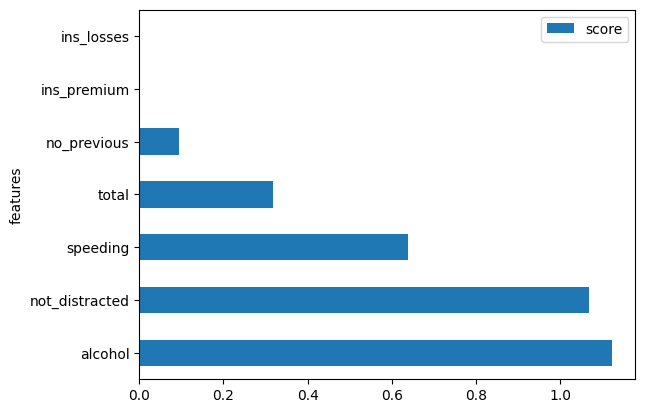

In [91]:
new_feat.plot(kind='barh',x='features',y='score')

# SelectKBest

In [92]:
from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import f_classif  # use for classification
# from sklearn.feature_selection import chi2  # use for classification
from sklearn.feature_selection import mutual_info_regression  # use for regression

In [93]:
SelectKBest?

In [94]:
x.shape

(51, 6)

In [95]:
#SelectKBest(score_function,k).fit_transform(input,output)
# X_new = SelectKBest(chi2, k=10).fit_transform(x,y)

X_new=SelectKBest(mutual_info_regression,k=10).fit_transform(x,y)

In [96]:
X_new.shape

(51, 6)

In [97]:
pd.DataFrame(X_new)

,0,1,2,3,4,5
0,7.332,5.640,18.048,15.040,784.55,145.08
1,7.421,4.525,16.290,17.014,1053.48,133.93
2,6.510,5.208,15.624,17.856,899.47,110.35
3,4.032,5.824,21.056,21.280,827.34,142.39
4,4.200,3.360,10.920,10.680,878.41,165.63
5,5.032,3.808,10.744,12.920,835.50,139.91
6,4.968,3.888,9.396,8.856,1068.73,167.02
7,6.156,4.860,14.094,16.038,1137.87,151.48
8,2.006,1.593,5.900,5.900,1273.89,136.05
9,3.759,5.191,16.468,16.826,1160.13,144.18


In [98]:
feat_imp=SelectKBest(k=10)

In [99]:
feat_imp.fit(x,y)

SelectKBest()

In [100]:
feat_imp.n_features_in_

6

In [101]:
feat_imp.scores_

array([ 1.42351884,  1.63381622, 12.69030149, 30.72682165,  1.17976947,
        0.81917748])

In [102]:
df_imp=pd.DataFrame(feat_imp.scores_,columns=['score'])
df_imp

,score
0,1.423519
1,1.633816
2,12.690301
3,30.726822
4,1.179769
5,0.819177


In [103]:
df1=pd.concat([df_imp,c_columns],axis=1)
df1

,score,features
0,1.423519,total
1,1.633816,speeding
2,12.690301,alcohol
3,30.726822,not_distracted
4,1.179769,no_previous
5,0.819177,ins_premium
6,NaN,ins_losses


In [104]:
final=df1.nlargest(10,'score')
final

,score,features
3,30.726822,not_distracted
2,12.690301,alcohol
1,1.633816,speeding
0,1.423519,total
4,1.179769,no_previous
5,0.819177,ins_premium
6,NaN,ins_losses


In [105]:
final.isna().sum()

,0
score,1
features,0


In [106]:
final.dropna(inplace=True)

In [107]:
final.isna().sum()

,0
score,0
features,0


In [108]:
new_cols=final['features']
new_cols

,features
3,not_distracted
2,alcohol
1,speeding
0,total
4,no_previous
5,ins_premium


In [127]:
x_new=c.loc[:,new_cols]
x_new

,not_distracted,alcohol,speeding,total,no_previous,ins_premium
0,18.048,5.640,7.332,18.8,15.040,784.55
1,16.290,4.525,7.421,18.1,17.014,1053.48
2,15.624,5.208,6.510,18.6,17.856,899.47
3,21.056,5.824,4.032,22.4,21.280,827.34
4,10.920,3.360,4.200,12.0,10.680,878.41
5,10.744,3.808,5.032,13.6,12.920,835.50
6,9.396,3.888,4.968,10.8,8.856,1068.73
7,14.094,4.860,6.156,16.2,16.038,1137.87
8,5.900,1.593,2.006,5.9,5.900,1273.89
9,16.468,5.191,3.759,17.9,16.826,1160.13


In [110]:
x.head(2)

,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
0,7.332,5.640,18.048,15.040,784.55,145.08
1,7.421,4.525,16.290,17.014,1053.48,133.93


In [111]:
x.shape

(51, 6)

In [128]:
x_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   not_distracted  51 non-null     float64
 1   alcohol         51 non-null     float64
 2   speeding        51 non-null     float64
 3   total           51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
dtypes: float64(6)
memory usage: 2.5 KB


# Correlation coef

In [113]:
c[:3]

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35


In [114]:
c.corr?

<Axes: >

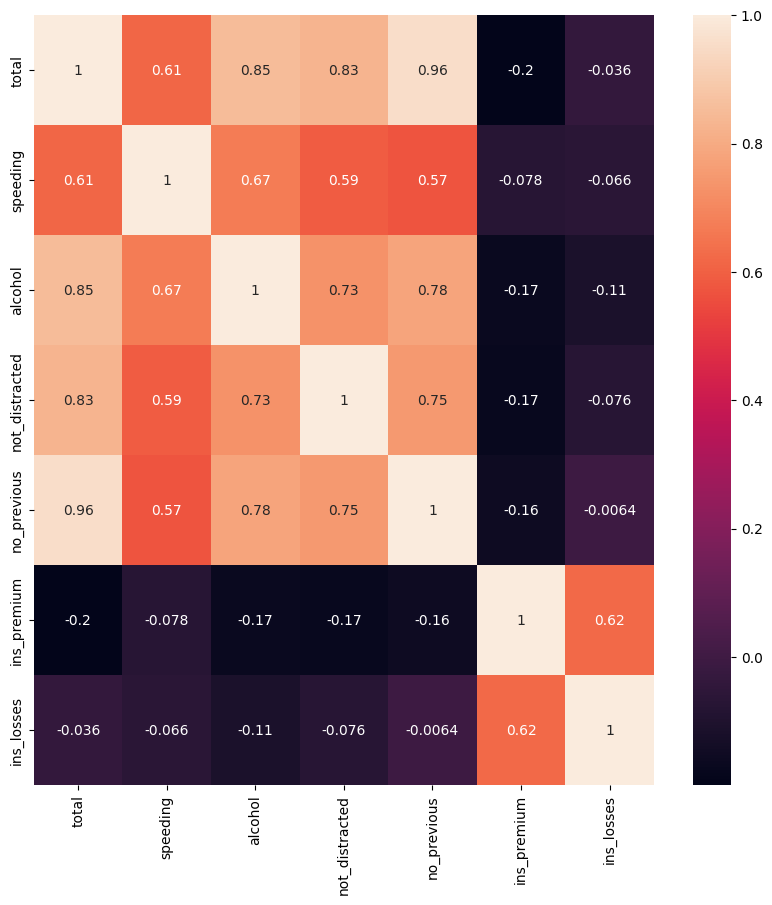

In [115]:
plt.figure(figsize=(10,10))
sns.heatmap(c.corr(),annot=True)

# RFE(Recursive Feature elimination)

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
lr=LinearRegression()


In [ ]:
# RFE(estimator= algorithm,no_of_features_to_select)

In [120]:
rf_new=RFE(estimator=lr,n_features_to_select=5)
rf_new

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [121]:
rf_new.fit(x,y)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [122]:
rf_new.n_features_in_

6

In [123]:
rf_new.support_

array([ True,  True,  True,  True, False,  True])

In [124]:
rf_new.ranking_

array([1, 1, 1, 1, 2, 1])

In [125]:
rf_new.estimator_

LinearRegression()

In [126]:
rf_new.fit_transform(x,y)

array([[  7.332,   5.64 ,  18.048,  15.04 , 145.08 ],
       [  7.421,   4.525,  16.29 ,  17.014, 133.93 ],
       [  6.51 ,   5.208,  15.624,  17.856, 110.35 ],
       [  4.032,   5.824,  21.056,  21.28 , 142.39 ],
       [  4.2  ,   3.36 ,  10.92 ,  10.68 , 165.63 ],
       [  5.032,   3.808,  10.744,  12.92 , 139.91 ],
       [  4.968,   3.888,   9.396,   8.856, 167.02 ],
       [  6.156,   4.86 ,  14.094,  16.038, 151.48 ],
       [  2.006,   1.593,   5.9  ,   5.9  , 136.05 ],
       [  3.759,   5.191,  16.468,  16.826, 144.18 ],
       [  2.964,   3.9  ,  14.82 ,  14.508, 142.8  ],
       [  9.45 ,   7.175,  14.35 ,  15.225, 120.92 ],
       [  5.508,   4.437,  13.005,  14.994,  82.75 ],
       [  4.608,   4.352,  12.032,  12.288, 139.15 ],
       [  3.625,   4.205,  13.775,  13.775, 108.92 ],
       [  2.669,   3.925,  15.229,  13.659, 114.47 ],
       [  4.806,   4.272,  13.706,  15.13 , 133.8  ],
       [  4.066,   4.922,  16.692,  16.264, 137.13 ],
       [  7.175,   6.765,  1

In [129]:
x.loc[:,rf_new.support_][:3]

,speeding,alcohol,not_distracted,no_previous,ins_losses
0,7.332,5.640,18.048,15.040,145.08
1,7.421,4.525,16.290,17.014,133.93
2,6.510,5.208,15.624,17.856,110.35


In [130]:
# use decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

rfe_dt = RFE(estimator=dtr,n_features_to_select=5)
rfe_dt.fit(x,y)

RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)

In [131]:
x.loc[:,rfe_dt.support_][:3]

,speeding,not_distracted,no_previous,ins_premium,ins_losses
0,7.332,18.048,15.040,784.55,145.08
1,7.421,16.290,17.014,1053.48,133.93
2,6.510,15.624,17.856,899.47,110.35


In [132]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [133]:
s=SelectKBest(mutual_info_regression,k=5)
s

SelectKBest(k=5, score_func=<function mutual_info_regression at 0x7d946fbf4220>)

In [134]:
s.fit(x,y)

SelectKBest(k=5, score_func=<function mutual_info_regression at 0x7d946fbf4220>)

In [135]:
s.scores_

array([0.31241827, 0.64528552, 1.10946033, 1.06395126, 0.1065329 ,
       0.        ])

In [137]:
final=pd.DataFrame(s.scores_,columns=['score'],index=x.columns)
final

,score
speeding,0.312418
alcohol,0.645286
not_distracted,1.109460
no_previous,1.063951
ins_premium,0.106533
ins_losses,0.000000


In [138]:
final.nlargest(5,'score')

,score
not_distracted,1.109460
no_previous,1.063951
alcohol,0.645286
speeding,0.312418
ins_premium,0.106533
